In [2]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn,x,y,cv = 10,scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


In [6]:
k_range = range(2,60)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn,x,y,cv = 10,scoring='accuracy')
    k_scores.append(cv_scores.mean())
    print('for no of neighbours = %s the cv mean score is %f' %(k,cv_scores.mean()))

for no of neighbours = 2 the cv mean score is 0.953333
for no of neighbours = 3 the cv mean score is 0.966667
for no of neighbours = 4 the cv mean score is 0.966667
for no of neighbours = 5 the cv mean score is 0.966667
for no of neighbours = 6 the cv mean score is 0.966667
for no of neighbours = 7 the cv mean score is 0.966667
for no of neighbours = 8 the cv mean score is 0.966667
for no of neighbours = 9 the cv mean score is 0.973333
for no of neighbours = 10 the cv mean score is 0.966667
for no of neighbours = 11 the cv mean score is 0.966667
for no of neighbours = 12 the cv mean score is 0.973333
for no of neighbours = 13 the cv mean score is 0.980000
for no of neighbours = 14 the cv mean score is 0.973333
for no of neighbours = 15 the cv mean score is 0.973333
for no of neighbours = 16 the cv mean score is 0.973333
for no of neighbours = 17 the cv mean score is 0.973333
for no of neighbours = 18 the cv mean score is 0.980000
for no of neighbours = 19 the cv mean score is 0.973333


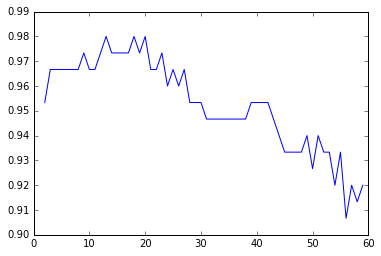

In [7]:
plt.plot(k_range,k_scores)

##### From the above plot we can see that the sv score maximum when no of neighbours is equals to 13,18,20 .. lesser the neighbours more the chance of overfitting so we will go with n_neigbours = 20

## Grid search cv for parameter tuning

In [33]:
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV

In [9]:
grid_param = dict(n_neighbors = list(k_range))
print(grid_param)

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]}


In [10]:
grid = GridSearchCV(knn,grid_param,cv = 10,scoring = 'accuracy',n_jobs= -1)

In [11]:
grid.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=59, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [12]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [13]:
print(grid.grid_scores_[1].cv_validation_scores)
print(grid.grid_scores_[1].parameters)
print(grid.grid_scores_[1].mean_validation_score)

[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.93333333  1.          1.          1.        ]
{'n_neighbors': 3}
0.966666666667


In [14]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

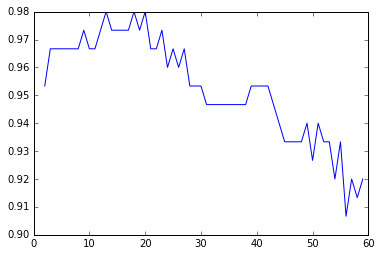

In [15]:
plt.plot(k_range,grid_mean_scores)

In [16]:
weights = ['uniform','distance']

In [24]:
grid_param1 = dict(n_neighbors = list(k_range),weights = weights )

In [25]:
grid1 = GridSearchCV(knn,grid_param1,cv = 10, scoring = 'accuracy', n_jobs=-1) 

In [29]:
grid1.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=59, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [32]:
print(grid1.best_score_)
print(grid1.best_params_)
print(grid1.best_estimator_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [34]:
grid_param2 = dict(n_neighbors = list(k_range),weights = weights )
grid2 = RandomizedSearchCV(knn,grid_param1,cv = 10, scoring = 'accuracy', n_jobs=-1) 
grid2.fit(x,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=59, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [40]:
grid2.grid_scores_

[mean: 0.95333, std: 0.04269, params: {'n_neighbors': 29, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 56, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 13, 'weights': 'distance'},
 mean: 0.90667, std: 0.06110, params: {'n_neighbors': 56, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 40, 'weights': 'uniform'},
 mean: 0.96000, std: 0.03266, params: {'n_neighbors': 51, 'weights': 'distance'},
 mean: 0.94000, std: 0.04667, params: {'n_neighbors': 49, 'weights': 'uniform'},
 mean: 0.96000, std: 0.04422, params: {'n_neighbors': 26, 'weights': 'uniform'},
 mean: 0.96000, std: 0.03266, params: {'n_neighbors': 59, 'weights': 'distance'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 18, 'weights': 'uniform'}]

### Parameter tuning in Random forest for iris data set

#### Lets first try and check how fast gridsearchcv works

In [48]:
from sklearn.ensemble import RandomForestClassifier
import datetime

In [64]:

RF = RandomForestClassifier()
grid3 = {"max_depth": [1,2,3, None],
              "max_features": ['auto',"sqrt","log2"],
              "min_samples_split": [1, 3],
              "min_samples_leaf": [1, 3],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
Time =  datetime.datetime.now()
RF_Grid = GridSearchCV(RF,grid3,cv = 10,scoring = 'accuracy',n_jobs = -1)
RF_Grid.fit(x,y)
print('Gridsearch run time is %s' %(datetime.datetime.now()-Time))

Gridsearch run time is 0:00:17.464382


### Lets look at the gridsearch results

In [65]:
print(RF_Grid.best_score_)
print(RF_Grid.best_params_)
print(RF_Grid.best_estimator_)

0.966666666667
{'max_features': 'auto', 'min_samples_split': 1, 'max_depth': 2, 'min_samples_leaf': 1, 'bootstrap': True, 'criterion': 'gini'}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### Lets try with Randomsearchcv

In [75]:
Time =  datetime.datetime.now()
RF_Rand = RandomizedSearchCV(RF,grid3,cv = 10,scoring = 'accuracy',n_jobs = -1,n_iter = 10)
RF_Rand.fit(x,y)
print('RandomsearchCV run time is %s' %(datetime.datetime.now()-Time))

RandomsearchCV run time is 0:00:03.828215


##### We can see that RandomsearchCV takes 14 seconds less than Gridsearchcv, whihc shows that RandomsearchCV is more time effiecient algorithm

##### Lets look at RnadomizedsearchCV results

In [67]:
print(RF_Rand.best_score_)
print(RF_Rand.best_params_)
print(RF_Rand.best_estimator_)

0.966666666667
{'max_features': 'sqrt', 'min_samples_split': 3, 'max_depth': 3, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


##### Once you find out the best parameters always try to fit the model again using all the data available..and then try to predict the out of sample data.. However GridsearchCV and RandomsizedsearchCV will automatically fit the model on complete data once it finds the best tunned parameters so we can direclty use it to predict out of sample data.

In [68]:
RF_Grid.predict([3,5,4,2])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [72]:
RF_Rand.predict([3,5,0,0])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])